In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from dsutil import plotting


## example 1

In [19]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
df[['name','age','gender','state','num_children','num_pets']]

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


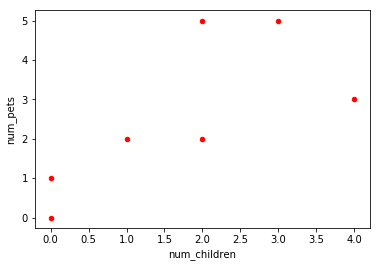

In [3]:
# plot num_children vs num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')

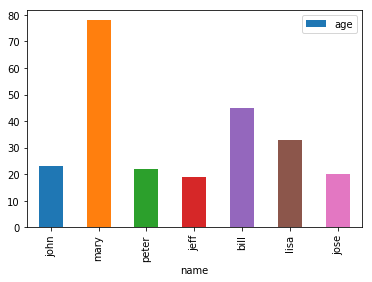

In [4]:
df.plot(kind='bar',x='name',y='age')

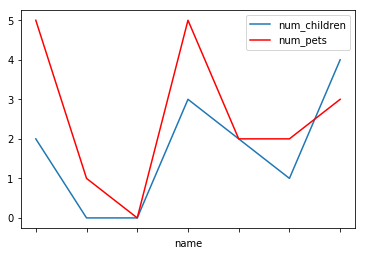

In [5]:
plt.clf()
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

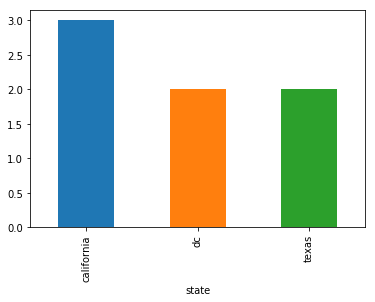

In [6]:
df.groupby('state')['name'].count().plot(kind='bar')

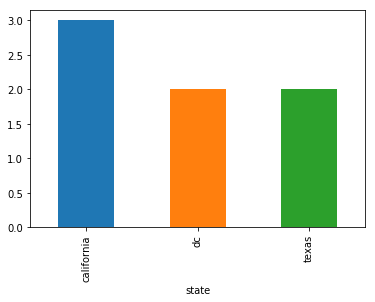

In [7]:
df.groupby('state').size().plot(kind='bar')

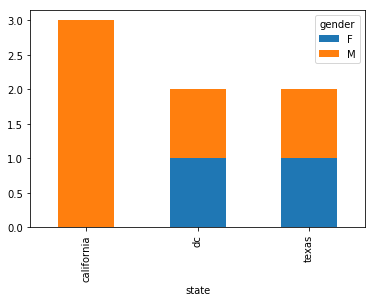

In [8]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

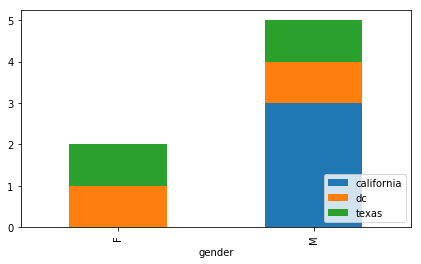

In [9]:
plt.clf()
df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc='lower right')
plt.gcf().set_size_inches(7,4)
plt.show()

## plot histogram for a dataframe column

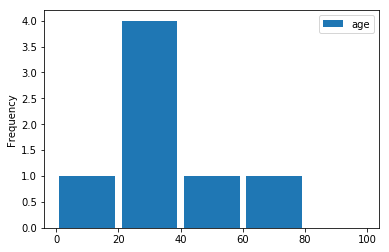

In [10]:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.9,)

## percent single

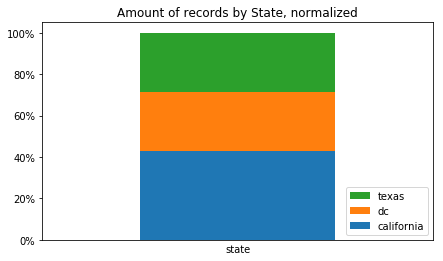

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(
 dummy = 1   
).groupby(['dummy','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)


plt.title('Amount of records by State, normalized')


# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')

plt.gcf().set_size_inches(7,4)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## percent, two-level group by

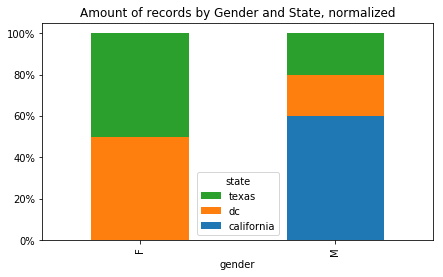

In [22]:
import matplotlib.ticker as mtick

df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Amount of records by Gender and State, normalized')
# plt.legend(loc='lower right')
plt.gcf().set_size_inches(7,4)
plt.show()

### date histograms

In [16]:
df = pd.DataFrame({
    'name':['john','lisa','peter','carl','linda','betty'],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

df

,date_of_birth,name
0,01/21/1988,john
1,03/10/1977,lisa
2,07/25/1999,peter
3,01/22/1977,carl
4,09/30/1968,linda
5,09/15/1970,betty


In [ ]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],infer_datetime_format=True)
df

In [ ]:
df.dtypes

In [ ]:
plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.xlabel('Month number')
plotting.add_grid()
plt.show()